In [2]:
import csv
import thesis_tools
import numpy as np
import pandas as pd

from scipy.stats import linregress
from itertools import chain

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import Normalize

import seaborn as sb
blue=sb.xkcd_palette(['windows blue'])[0]
amber=sb.xkcd_palette(['amber'])[0]
% matplotlib inline

In [4]:
sheffer_data=pd.read_csv('sheffer_co_h2.csv')
burgh_data=pd.read_csv('burghtable2.csv')

In [5]:
with open('primary_sightlines.csv','rb') as csvfile:
    inp=csv.reader(csvfile)
    primary_sightlines=inp.next()

sl_data=thesis_tools.load_data(primary_sightlines)
all_data=thesis_tools.load_results(sl_data)

/Users/codydirks/python/thesis_tools/loaders.py:107: RuntimeWarning: divide by zero encountered in log10
  n_dict[ion+'_err']=round(np.log10(n_err),3)
/Users/codydirks/python/thesis_tools/utilities.py:41: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt((((cos*del_l+sin*del_b)/a)**2+((sin*del_l-cos*del_b)/b)**2))


Text(15.5,11,u'Integrated')

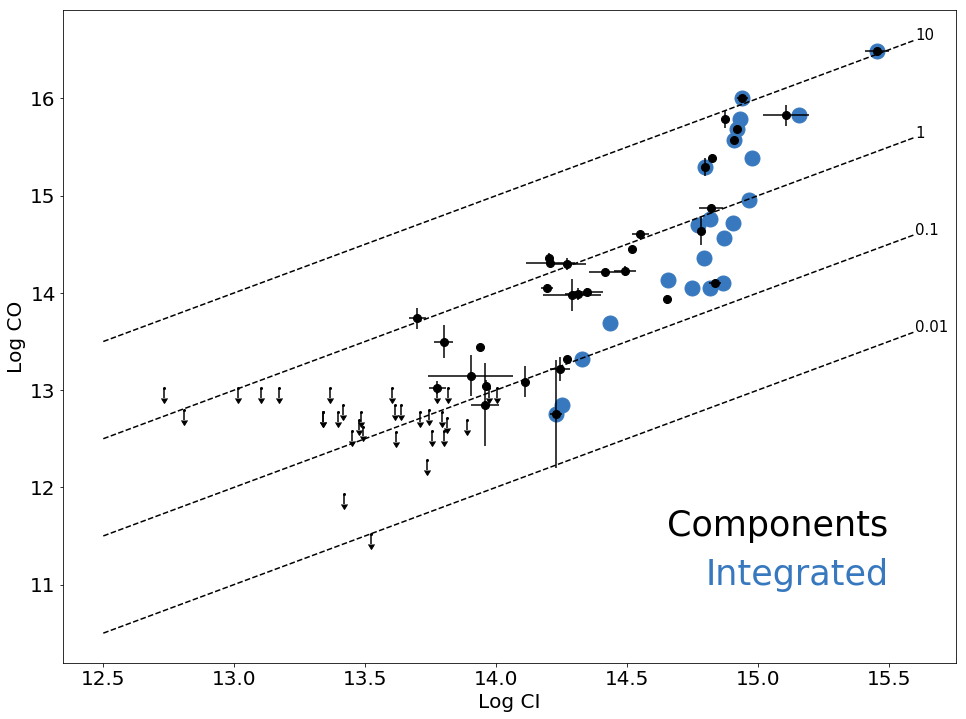

In [6]:
fig=plt.figure(1,figsize=(16,12))
subplt=plt.subplot(111)

cut_data=all_data[(all_data['C']>0)]
for sl,data in cut_data.groupby('Sightline'):
    cs_to_sum=all_data[all_data['Sightline']==sl]
    cs=[np.log10(np.sum([10**row[col] for col in ('C','C*','C**')])) for idx,row in cs_to_sum.iterrows()]
    c_errs=list(chain.from_iterable([list(row) for idx,row in cs_to_sum[['C_err','C*_err','C**_err']].iterrows()]))
    c_sum=np.log10(np.sum([10**n for n in cs]))
    c_sum_err=0.434*np.sqrt(np.sum([10**(2*n) for n in c_errs]))/(10**c_sum)
    
    cos_to_sum=all_data[all_data['Sightline']==sl]
    co_sum=np.log10(np.sum([10**n for n in cos_to_sum['CO']]))
    co_sum_err=0.434*np.sqrt(np.sum([10**(2*n) for n in cos_to_sum['CO_err']]))/(10**(co_sum))
    subplt.plot(c_sum,co_sum,marker='o',color=blue,markersize=15,zorder=-1)
    
    num_c_comps=len(all_data[(all_data['Sightline']==sl)&(all_data['C']>0)])
    for idx,row in data.iterrows():
        c=np.log10(np.sum([10**row[col] for col in ('C','C*','C**')]))
        c_err=0.434*np.sum([10**row[col+'_err'] for col in ('C','C*','C**')])/10**c
        if row['CO']<10:
            subplt.errorbar(row['C'],row['CO_err'],
                            yerr=0.1, uplims=True,color='k',marker='o',markersize=2)
        else:
            co_err=0.434*(10**(row['CO_err']-row['CO']))
            subplt.errorbar(c,row['CO'],xerr=c_err,yerr=co_err,marker='o',color='k',markersize=8)
        #subplt.text(c, row['CO'], sl+' '+str(row['Velocity']))
        #print '\t',10**(row['CO']-c_tot)
    
    
tx=np.arange(12.5,15.7,0.1)
for rat in (0.01,0.1,1,10):
    ty=np.array([np.log10(rat*(10**x)) for x in tx])
    subplt.plot(tx,ty,'k--')
    subplt.text(tx[-1],ty[-1],str(rat),fontsize=15)
subplt.set_ylabel('Log CO',fontsize=20)
subplt.set_xlabel('Log CI',fontsize=20)
subplt.tick_params(axis='both', which='major', labelsize=20)

subplt.text(15.5,11.5,'Components',color='k',fontsize=35,horizontalalignment='right')
subplt.text(15.5,11,'Integrated',color=blue,fontsize=35,horizontalalignment='right')

#plt.savefig('/Users/codydirks/Desktop/components_vs_integrated.pdf')

Text(15.5,11.5,u'Mine')

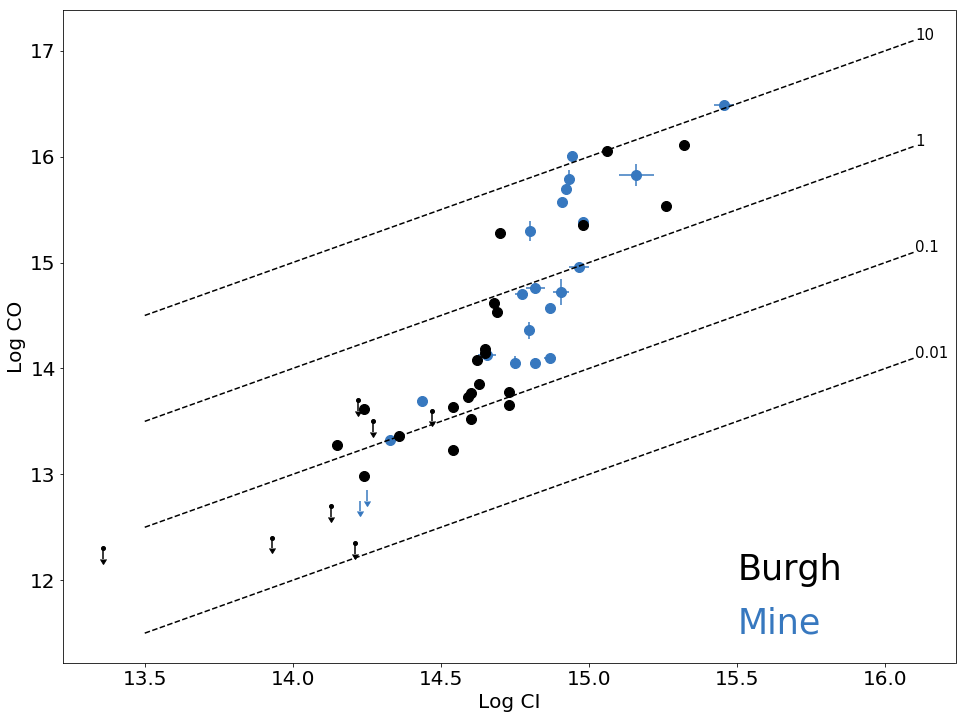

In [7]:
fig=plt.figure(1,figsize=(16,12))
subplt=plt.subplot(111)

cut_data=all_data[(all_data['C']>0)]
for sl,data in cut_data.groupby('Sightline'):
    cs_to_sum=all_data[all_data['Sightline']==sl]
    cs=[np.log10(np.sum([10**row[col] for col in ('C','C*','C**')])) for idx,row in cs_to_sum.iterrows()]
    c_errs=list(chain.from_iterable([list(row) for idx,row in cs_to_sum[['C_err','C*_err','C**_err']].iterrows()]))
    c_sum=np.log10(np.sum([10**n for n in cs]))
    c_sum_err=0.434*np.sqrt(np.sum([10**(2*n) for n in c_errs]))/(10**c_sum)
    
    cos_to_sum=all_data[all_data['Sightline']==sl]
    co_sum=np.log10(np.sum([10**n for n in cos_to_sum['CO']]))
    #print cos_to_sum[['Velocity','CO','CO_err','C']]
    co_sum_err=0.434*np.sqrt(np.sum([10**(2*n) for n in cos_to_sum['CO_err']]))/(10**(co_sum))
    if co_sum_err>0.2:
        subplt.errorbar(c_sum,co_sum,yerr=0.1,uplims=True,color=blue,markersize=15,zorder=-1)
    else:
        subplt.errorbar(c_sum,co_sum,xerr=c_sum_err,yerr=co_sum_err,marker='o',color=blue,markersize=10,zorder=-1)
    

for idx,row in burgh_data.iterrows():
    if row['Sightline'] not in all_data['Sightline'].unique():
    # TODO: Add in upper limits
        if row['CO'].startswith('<'):
            co=float(row['CO'][1:])
            cI=float(row['CI'])
            subplt.errorbar(cI,co,yerr=0.1, uplims=True,color='k',marker='o',markersize=4)
        else:
            subplt.plot(float(row['CI']),float(row['CO']),marker='o',color='k',markersize=10)

    
tx=np.arange(13.5,16.1,0.1)
for rat in (0.01,0.1,1,10):
    ty=np.array([np.log10(rat*(10**x)) for x in tx])
    subplt.plot(tx,ty,'k--')
    subplt.text(tx[-1],ty[-1],str(rat),fontsize=15)
subplt.set_ylabel('Log CO',fontsize=20)
subplt.set_xlabel('Log CI',fontsize=20)
subplt.tick_params(axis='both', which='major', labelsize=20)

subplt.text(15.5,12,'Burgh',color='k',fontsize=35)
subplt.text(15.5,11.5,'Mine',color=blue,fontsize=35)

#plt.savefig('/Users/codydirks/Desktop/burgh_vs_mine.pdf')

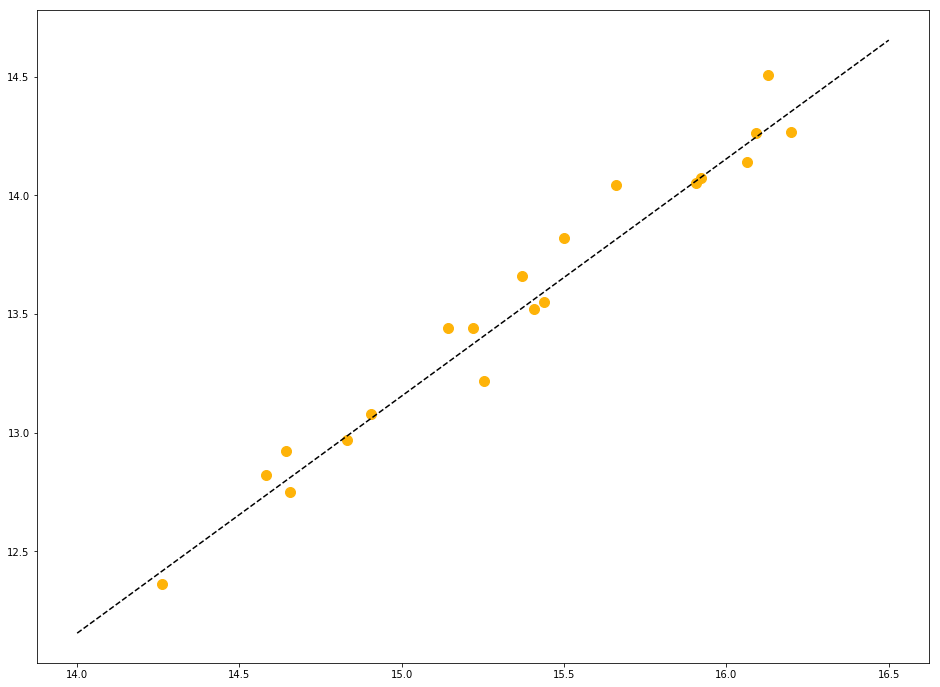

In [13]:
# 12CO/13CO Plots
# Filter results 
nco_min=12
nco_max=17
ncl_min=11 # Below this, Balashev conversion to H2 becomes extremely uncertain
#cut=all_data.loc[(all_data['Cl_I']>ncl_min) & (all_data['13CO']>12)]
cut=all_data.loc[(all_data['12CO/13CO']>0)&(all_data['12CO/13CO']<100)&(all_data['13CO']>13)]

# Sightline | CO | 13CO
sheffer_isotope_data=[('HD22951', 1.83e14,2.31e12),
('HD23180', 6.78e14,9.32e12),
('HD23478', 8.05e14,12.0e12),
('HD24398', 17.9e14,16.5e12),
('HD24534', 158e14,186.0e12),
('HD27778', 123e14,183.0e12),
('HD99872', 4.54e14,5.6e12),
('HD147683', 80.3e14,113e12),
('HD148937', 3.81e14,6.6e12),
('HD177989', 4.4e14,8.35e12),
('HD192035', 13.9e14,27.5e12),
('HD198781', 16.6e14,27.7e12),
('HD203374A', 25.5e14,33.3e12),
('HD203532', 45.6e14,111e12),
('HD206267A', 134e14,322e12),
('HD207198', 31.6e14,66.1e12),
('HD207308', 83.2e14,118e12),
('HD207538', 23.4e14,45.6e12),
('HD208266', 116e14,138e12),
('HD210839', 27.5e14,35.4e12)]


fig=plt.figure(1,figsize=(16,12))
subplt=plt.subplot(111)
cm = plt.cm.get_cmap('viridis')
subplt.scatter(cut['CO'],cut['13CO'],marker='o',color=blue,s=100)

x2=[]
y2=[]
for entry in sheffer_isotope_data:
    if entry[0] not in cut['Sightline'].values:
        x2.append(np.log10(entry[1]))
        y2.append(np.log10(entry[2]))
subplt.scatter(x2,y2,marker='o',color=amber,s=100)

tx=np.arange(14,17,0.5)
ty=np.array([np.log10((10**x)/70) for x in tx])
subplt.plot(tx,ty,'k--')

/Users/codydirks/anaconda2/envs/astroconda/lib/python2.7/site-packages/matplotlib/ticker.py:2210: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


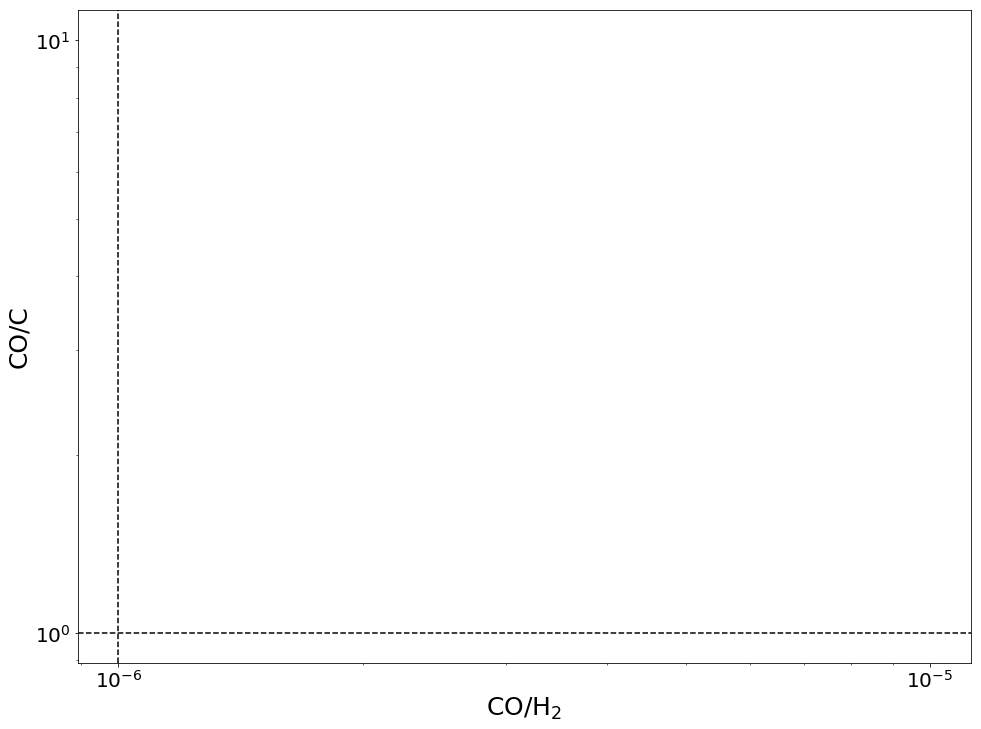

In [8]:
fig=plt.figure(1,figsize=(16,12))

subplt=plt.subplot(111)

cut_data=all_data[(all_data['C']>0) & (all_data['CO']>12) & (all_data['H_2']>0)]
for sl,data in cut_data.groupby('Sightline'):
    num_c_comps=len(all_data[(all_data['Sightline']==sl)&(all_data['C']>0)])
    for idx,row in data.iterrows():
        c=np.log10(np.sum([10**row[col] for col in ('C','C*','C**')]))
        if row['CO_err']/0.434>1:
            subplt.errorbar(c-row['H_2'],np.log10(row['CO_err']/0.434*10**(row['CO']))-row['H_2'],
                            yerr=0.1, uplims=True,color='k',marker='o',markersize=4)
        else:
            subplt.plot(10**(row['CO']-row['H_2']),10**(row['CO']-c),marker='o',color='k',markersize=50*(row['f_H2']))
            
    to_sum=all_data[all_data['Sightline']==sl]
    cs=[np.log10(np.sum([10**row[col] for col in ('C','C*','C**')])) for idx,row in to_sum.iterrows()]
    c_tot=np.log10(np.sum([10**n for n in cs]))
    
    co_tot=np.log10(np.sum([10**n for n in to_sum['CO']]))
    
    h2_tot=np.log10(np.sum([10**n for n in to_sum['H_2']]))
    #subplt.plot(10**(co_tot-h2_tot),10**(co_tot-c_tot),'ko',markersize=10)


subplt.set_yscale('log')
subplt.set_xscale('log')
#subplt.set_ylim(0.007,100)
#subplt.set_xlim(1e-8,1e-4)
subplt.axvline(1e-6,0,1,color='k',linestyle='--')
subplt.axhline(1.0,0,1,color='k',linestyle='--')

subplt.set_xlabel('CO/H$_2$',fontsize=25)
subplt.set_ylabel('CO/C',fontsize=25)
subplt.tick_params(axis='both', which='major', labelsize=20)

#plt.savefig('/Users/codydirks/Desktop/co_c_h2_ratios_integrated.pdf')

0.126
0.0719738857518
0.121059871678
0.131
0.025


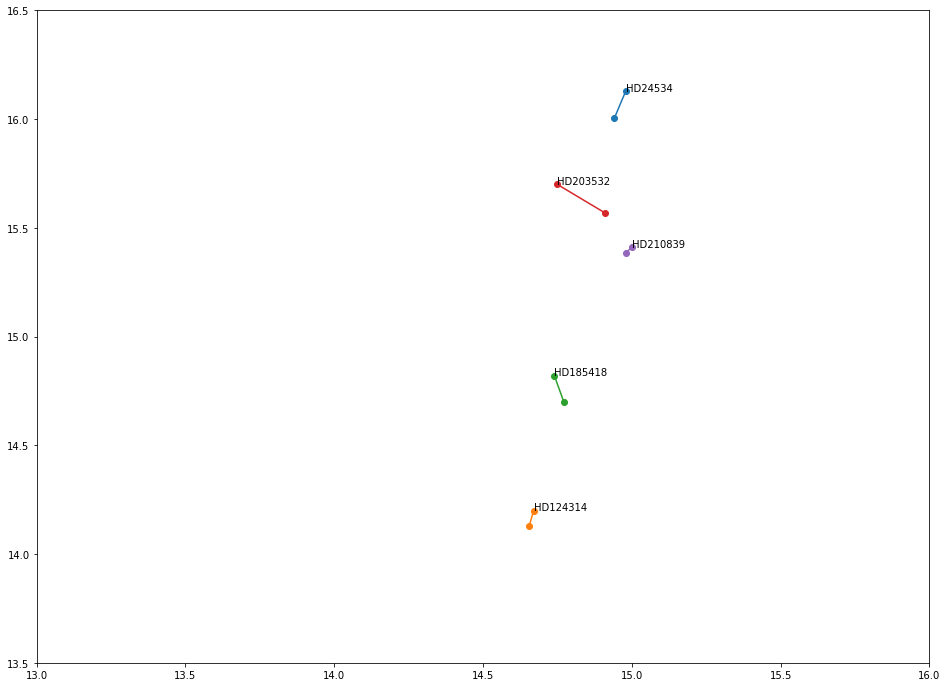

In [11]:
# Compares CO and C columns for sightlines that overlap between my sample and Burgh's
fig=plt.figure(1,figsize=(16,12))
subplt=plt.subplot(111)
subplt.set_ylim(13.5,16.5)
subplt.set_xlim(13,16)

burgh_data=pd.read_csv('burghtable2.csv')
for idx, burgh_row in burgh_data.iterrows():
    if burgh_row['Sightline'] in all_data['Sightline'].unique():
        cs_to_sum=all_data[all_data['Sightline']==burgh_row['Sightline']]
        cs=[np.log10(np.sum([10**row[col] for col in ('C','C*','C**')])) for idx,row in cs_to_sum.iterrows()]
        c_tot=np.log10(np.sum([10**n for n in cs]))
        
        cos_to_sum=all_data[all_data['Sightline']==burgh_row['Sightline']]
        co_tot=np.log10(np.sum([10**n for n in cos_to_sum['CO']]))
        
        subplt.plot([float(burgh_row['CI']),c_tot],[float(burgh_row['CO']),co_tot],marker='o')
        subplt.text(float(burgh_row['CI']),float(burgh_row['CO']),burgh_row['Sightline'])
        print float(burgh_row['CO'])-co_tot

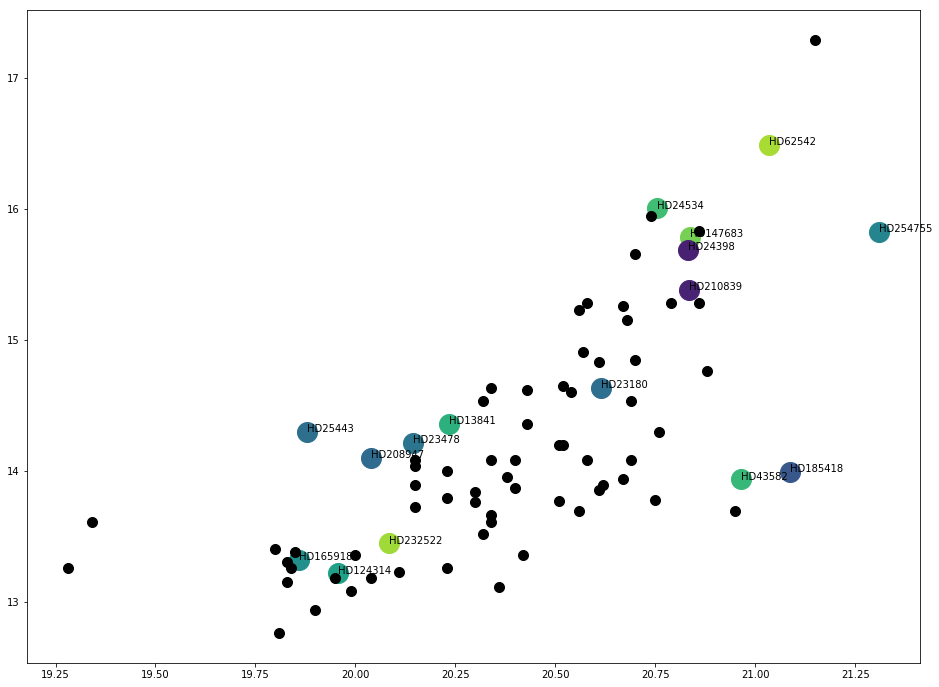

In [10]:
# CO-to-H2 plot
fig=plt.figure(1,figsize=(16,12))
subplt=plt.subplot(111)
cm = plt.cm.get_cmap('viridis_r')

s1=[]
s2=[]

nco_min=12
nco_max=17
ncl_min=13.5 # Below this, Balashev conversion to H2 becomes extremely uncertain
#cut=all_data.loc[(all_data['Cl_I']>ncl_min) & (all_data['13CO']>12)]
cut=all_data[(all_data['CO']>13)&(all_data['R_dist']<20)&(all_data['Cl']>13.5)]
norm=Normalize(vmin=0,vmax=10)
for sl in cut.groupby('Sightline'):
    row=sl[1].sort_values('CO',ascending=False).iloc[0]
    x=row['H_2']
    y=row['CO']
    s1.append(10**(row['CO']-row['H_2']))
    col=cm(norm(row['R_dist']))
    subplt.plot(x,y,marker='o',color=col,markersize=20)
    subplt.text(x,y,row['Sightline'])
for idx,row in sheffer_data.iterrows():
    subplt.plot(row['H2'],row['CO'],'ko',markersize=10)
    s2.append(10**(row['CO']-row['H2']))
    